In [ ]:
!pip install neuralprophet==0.9.0
!python --version

In [22]:
from neuralprophet import NeuralProphet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('/kaggle/input/btc-all/1h.csv')
data['ds'] = pd.to_datetime(data['ds'])
data = data[250:]

pd.isna(data).values.any()

False

In [24]:
del data['open']

for i in ['count', 'feeValue', 'inputCount', 'inputValue', 'minedValue', 'outputCount','outputValue','fee_avg', 'btc_dom', 'open_interest', 'volume', 'SPX', 'NDX', 'DXY', 'DJI', 'VIX', 'GOLD']:
    data[i] = np.log2(data[i])

data = data.rename(columns={'SMA50':'y'})
data

,ds,high,low,close,volume,count,feeValue,inputCount,inputValue,minedValue,...,long_short_ratio,funding_rate,sentiment_mean,sentiment_sum,SPX,DXY,DJI,VIX,NDX,GOLD
250,2021-12-11 10:00:00,48580.83,48301.33,48379.32,12.151002,14.115613,-0.742291,15.226525,18.292814,5.470790,...,2.072002,0.000100,-0.0468,-7.5805,12.202017,6.585594,15.134497,4.229588,13.995316,10.799974
251,2021-12-11 11:00:00,48454.85,48150.00,48222.24,12.243803,13.588598,-1.154175,14.777718,17.812793,5.465952,...,2.060437,0.000100,-0.0468,-7.5805,12.202017,6.585594,15.134497,4.229588,13.995316,10.799974
252,2021-12-11 12:00:00,48564.41,48167.35,48494.73,12.386627,13.314158,-1.585721,14.514468,16.572853,5.241579,...,2.082958,0.000100,-0.0468,-7.5805,12.202017,6.585594,15.134497,4.229588,13.995316,10.799974
253,2021-12-11 13:00:00,48934.06,48200.01,48346.96,13.698536,13.215988,-1.624713,14.315928,15.573874,4.980678,...,2.017530,0.000100,-0.0468,-7.5805,12.202017,6.585594,15.134497,4.229588,13.995316,10.799974
254,2021-12-11 14:00:00,48551.91,48150.00,48451.85,12.875240,13.172896,-1.805612,14.501651,17.240501,5.460613,...,2.024226,0.000100,-0.0468,-7.5805,12.202017,6.585594,15.134497,4.229588,13.995316,10.799974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23365,2024-07-31 13:00:00,66826.30,66102.10,66484.50,13.977356,14.235566,-1.369349,15.216140,14.925880,4.001088,...,1.914600,0.000072,-0.0077,-1.7933,12.408168,6.708201,15.314048,4.105175,14.197642,11.207185
23366,2024-07-31 14:00:00,66706.20,65939.70,66409.90,14.164621,13.738515,-0.790526,14.761603,14.791169,3.709085,...,1.859600,0.000072,-0.0077,-1.7933,12.427061,6.699871,15.313046,4.043519,14.233242,11.207185
23367,2024-07-31 15:00:00,66531.30,66289.40,66354.50,12.443766,14.058499,-0.505745,15.213560,14.678878,4.029391,...,1.853100,0.000072,-0.0077,-1.7933,12.431174,6.702353,15.320361,4.017031,14.236943,11.207185
23368,2024-07-31 16:00:00,66745.80,66260.00,66334.30,13.180259,14.857203,-0.142731,16.052589,15.607241,4.859513,...,1.840100,0.000038,-0.0077,-1.7933,12.431385,6.702893,15.322288,4.025029,14.237842,11.207185


In [25]:
histr_columns = ['high', 'low', 'volume', 'count', 'feeValue', 'inputCount', 'minedValue', 'outputCount','fee_avg', 'RSI', 'STOCHK', 'ATR', 'MACD12', 'MACD24','CCI', 'ADX', 'DPO', 'MI', 'WILLR',
                 'eth_btc','btc_dom', 'open_interest', 'long_short_ratio', 'EMA200', 'SMA200', 'WMA200', 'EMA50', 'WMA50', 'VWAP', 'MMA']
data=data[['ds', 'y']+histr_columns]

In [26]:
df=data[:-200]
df

,ds,y,high,low,volume,count,feeValue,inputCount,minedValue,outputCount,...,btc_dom,open_interest,long_short_ratio,EMA200,SMA200,WMA200,EMA50,WMA50,VWAP,MMA
250,2021-12-11 10:00:00,48248.508,48580.83,48301.33,12.151002,14.115613,-0.742291,15.226525,5.470790,15.600581,...,10.018339,15.240856,2.072002,50390.270,49906.280,49202.418,48446.920,48152.625,47996.055,48550.130
251,2021-12-11 11:00:00,48229.223,48454.85,48150.00,12.243803,13.588598,-1.154175,14.777718,5.465952,15.019026,...,10.012345,15.250569,2.060437,50368.700,49865.582,49185.664,48438.110,48151.594,48001.310,48539.200
252,2021-12-11 12:00:00,48213.285,48564.41,48167.35,12.386627,13.314158,-1.585721,14.514468,5.241579,15.054943,...,10.014578,15.246035,2.082958,50350.050,49824.910,49172.023,48440.330,48162.004,48032.020,48537.720
253,2021-12-11 13:00:00,48197.223,48934.06,48200.01,13.698536,13.215988,-1.624713,14.315928,4.980678,15.309583,...,10.015276,15.260045,2.017530,50330.120,49782.830,49157.316,48436.668,48167.246,48171.120,48531.360
254,2021-12-11 14:00:00,48178.610,48551.91,48150.00,12.875240,13.172896,-1.805612,14.501651,5.460613,14.758848,...,10.017504,15.281313,2.024226,50311.430,49740.664,49144.074,48437.266,48177.234,48316.280,48528.710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23165,2024-07-23 05:00:00,67342.445,66932.60,66285.60,14.155349,16.022823,0.074291,16.365331,5.146812,17.164730,...,11.269477,16.305962,1.042694,65136.918,65361.940,66241.090,67232.086,67418.550,67360.230,67142.910
23166,2024-07-23 06:00:00,67332.160,66742.10,66351.00,13.417156,14.726804,-1.234999,15.235341,4.004487,15.929698,...,11.268717,16.311990,1.143476,65150.440,65390.266,66252.375,67203.220,67385.360,67300.690,67121.350
23167,2024-07-23 07:00:00,67322.840,66628.30,66216.10,12.897054,14.894581,-1.398046,15.461447,4.257723,16.113579,...,11.268308,16.321799,1.171689,65164.367,65419.184,66263.914,67177.600,67354.690,67244.950,67102.305
23168,2024-07-23 08:00:00,67326.234,66978.30,66485.30,13.597387,15.043754,-0.672602,16.015698,4.845609,16.293490,...,11.266552,16.321056,1.176472,65181.234,65447.547,66278.250,67165.125,67336.516,67181.600,67094.200


In [ ]:
forecast_horizon = 16

m = NeuralProphet(
    n_lags=7 * forecast_horizon,
    n_forecasts=forecast_horizon,
    n_changepoints=20,
    changepoints_range=0.9,
    trend_reg=0.1,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    ar_layers=[64, 64, 64, 64],
    lagged_reg_layers=[32, 32, 32],
    ar_reg=1,
    learning_rate=0.002,
    epochs=300,
    accelerator='cuda',
    normalize='standardize'
)

for column in histr_columns:
    m.add_lagged_regressor(column, n_lags=9 * forecast_horizon)

metrics_train = m.fit(df=df, validation_df=data[-312:])

In [28]:
metrics_train

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,train_loss,reg_loss,MAE,RMSE,Loss,RegLoss
0,1269.345947,1610.267578,0.018070,0.000000,0,0.151082,0.000000,4304.355469,7015.989258,0.150944,0.000000
1,1095.994629,1369.199585,0.013086,0.000000,1,0.007624,0.000000,900.519653,1194.528564,0.007621,0.000000
2,891.220764,1115.538208,0.008687,0.000000,2,0.004615,0.000000,699.534363,928.275818,0.004614,0.000000
3,791.160278,980.989502,0.006718,0.000000,3,0.003316,0.000000,584.316833,783.453552,0.003315,0.000000
4,716.412354,879.483154,0.005399,0.000000,4,0.002440,0.000000,494.796692,668.763062,0.002440,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
295,187.521408,257.198944,0.002477,0.002016,295,0.002116,0.002018,85.277954,135.493820,0.002116,0.002018
296,189.853577,260.872437,0.002488,0.002013,296,0.002113,0.002014,85.599831,135.647598,0.002113,0.002014
297,188.660507,259.697571,0.002480,0.002009,297,0.002110,0.002011,86.022560,135.872055,0.002109,0.002011
298,186.327576,256.108124,0.002463,0.002005,298,0.002105,0.002007,85.579948,135.515289,0.002105,0.002007


In [32]:
def viz(idx):
    input_df = m.make_future_dataframe(data[:idx], periods=forecast_horizon)  # periods=m.n_forecasts, n_historic_predictions=False
    true_df = data[idx:idx+forecast_horizon]
    predicted_df = m.predict(input_df, raw=True, decompose=False)

    time_delta = pd.Timedelta(hours=1)
    predicted_dates = [predicted_df['ds'][0] + i * time_delta for i in range(forecast_horizon)]
    predicted_values = [predicted_df[f'step{i}'][0] for i in range(forecast_horizon)]

    plt.figure(figsize=(20, 7))

    plt.plot(input_df['ds'], input_df['y'], label='Вхідні дані', color='green')
    plt.plot(true_df['ds'], true_df['y'], label='Справжні дані', color='blue')
    plt.plot(predicted_dates, predicted_values, label='Передбачені дані', color='red', linestyle='--')

    plt.xlabel('Дата')
    plt.ylabel('Ціна')
    plt.title('Вхідні, справжні та передбачені дані')
    plt.legend()
    plt.grid(True)
    plt.show()

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


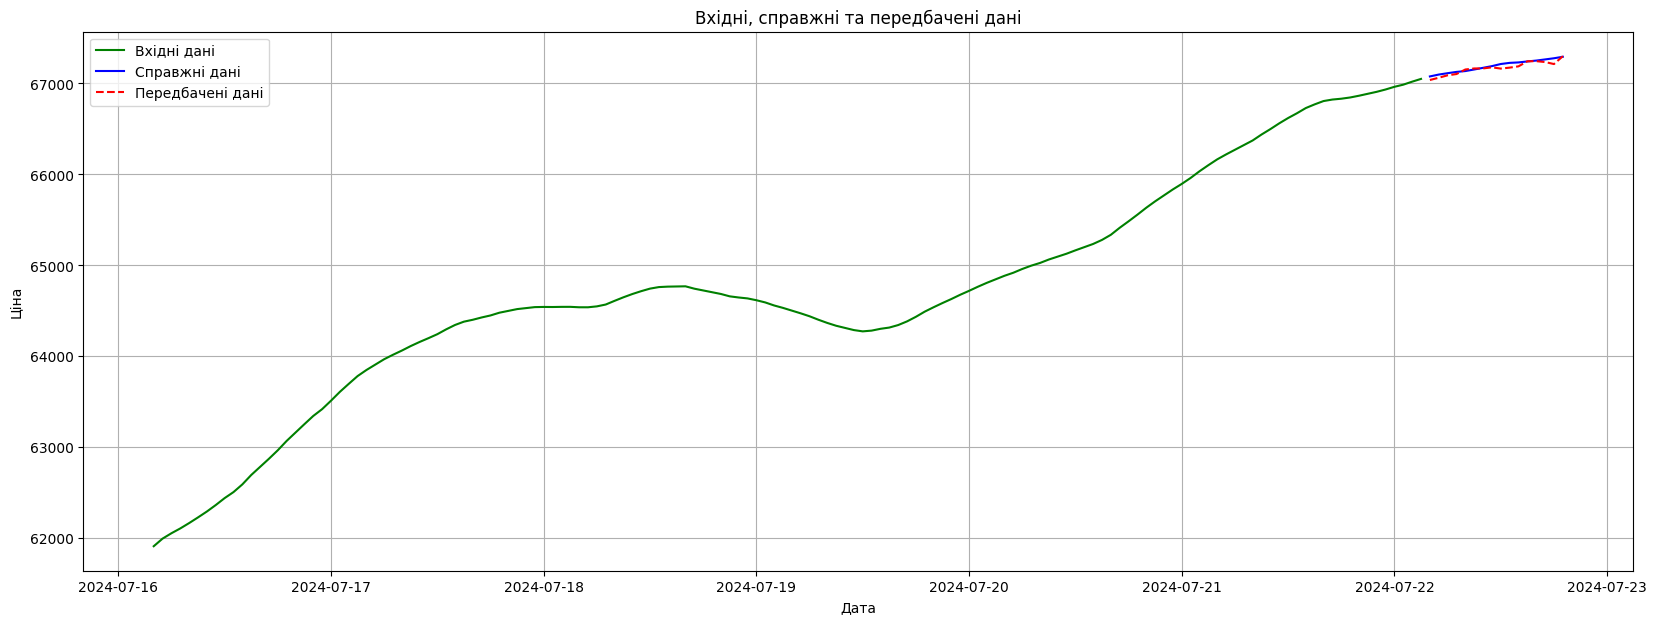

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


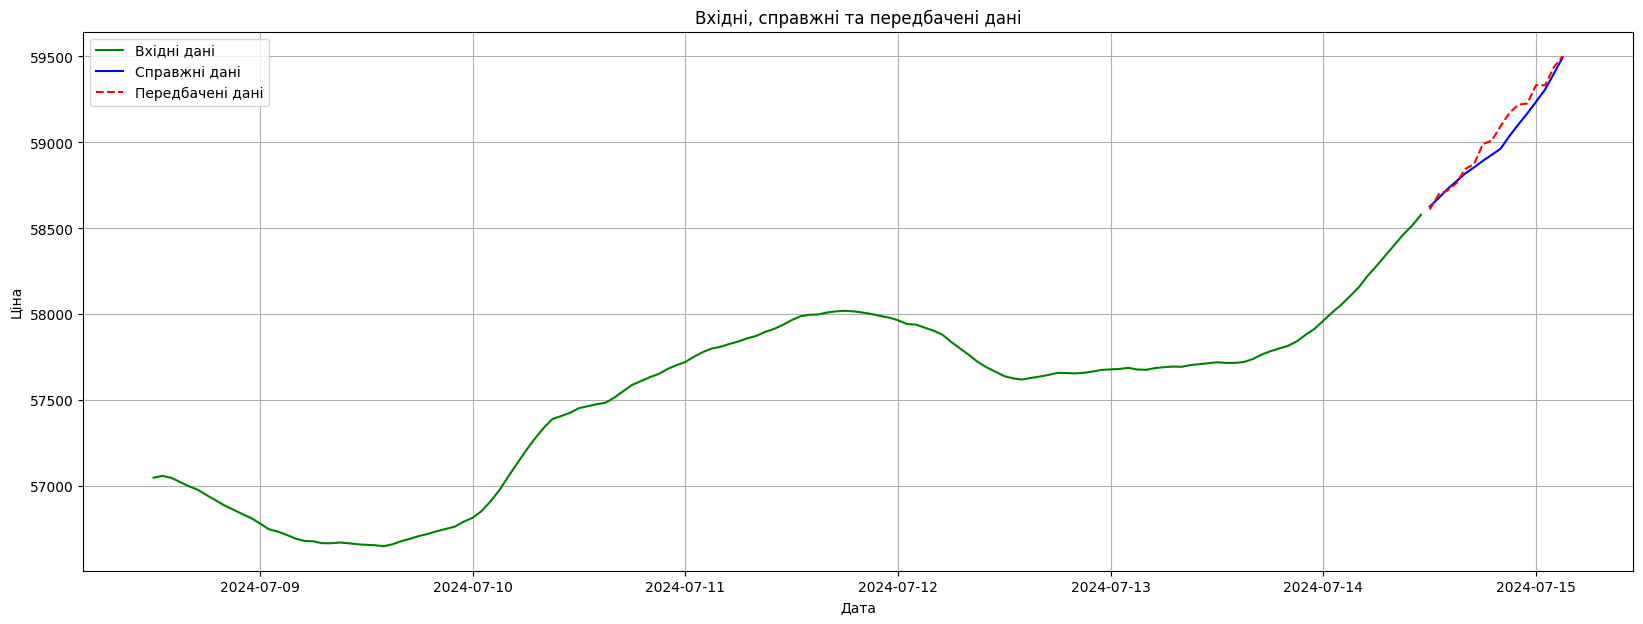

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


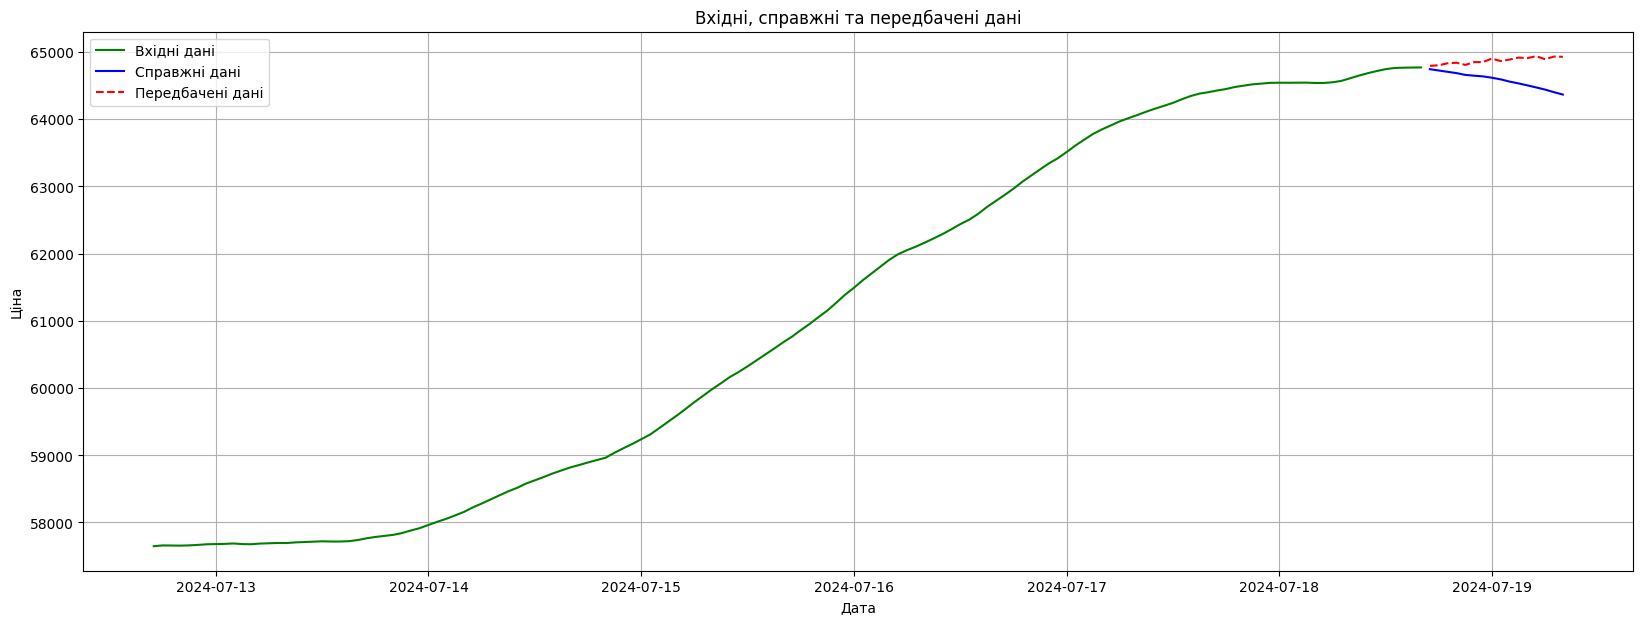

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


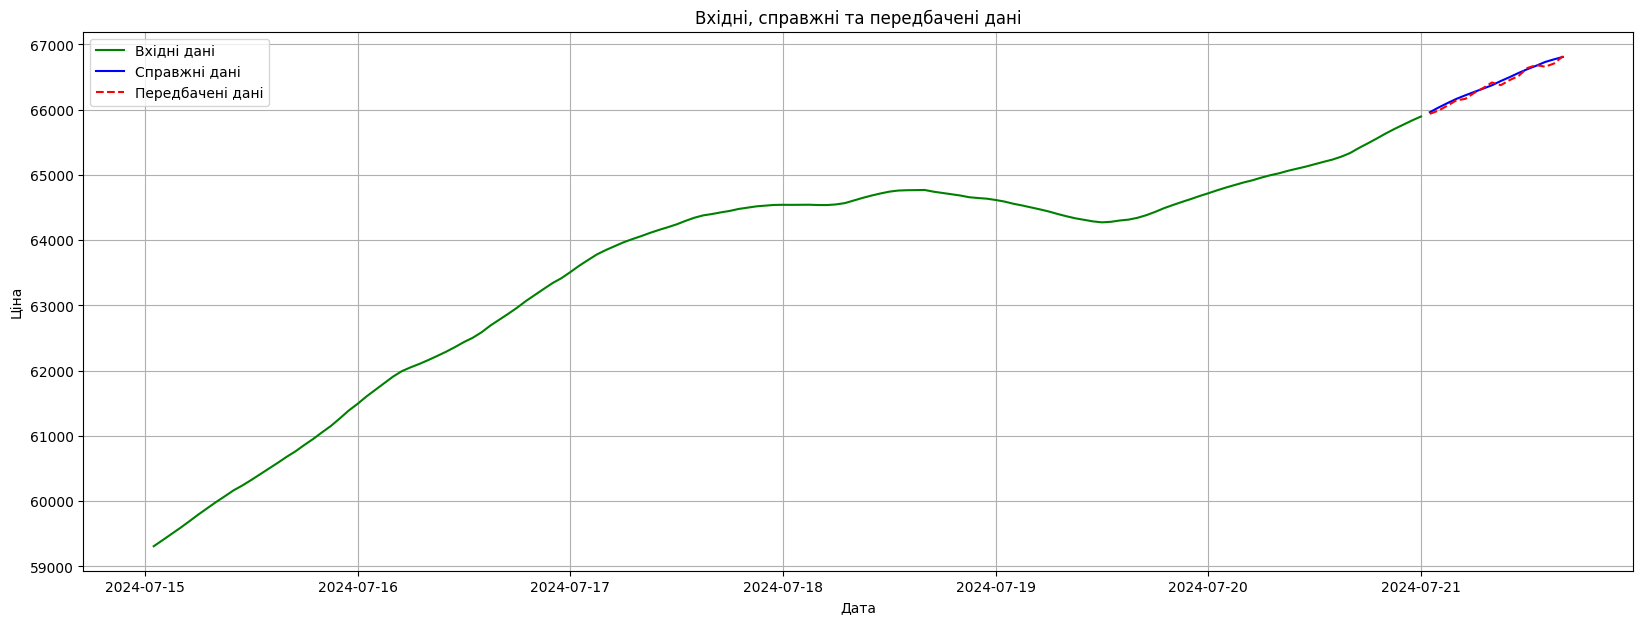

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


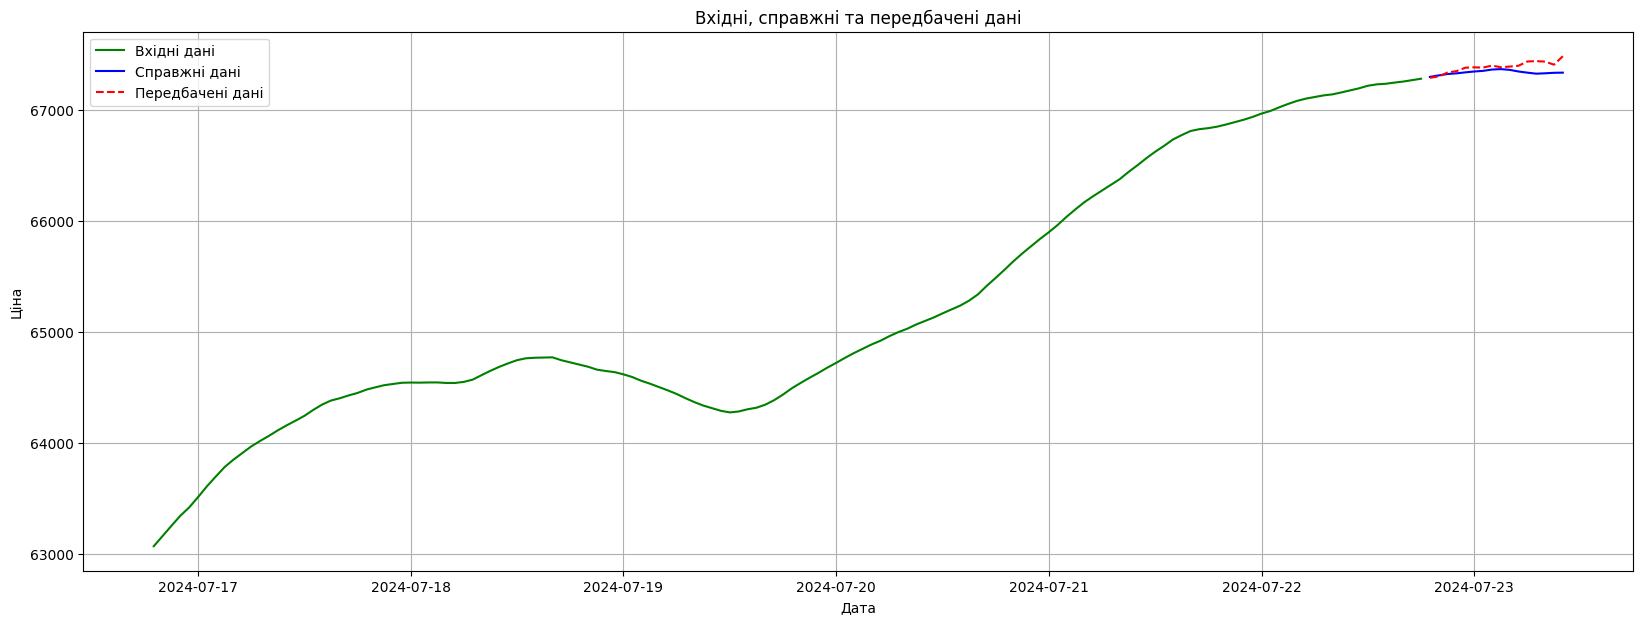

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


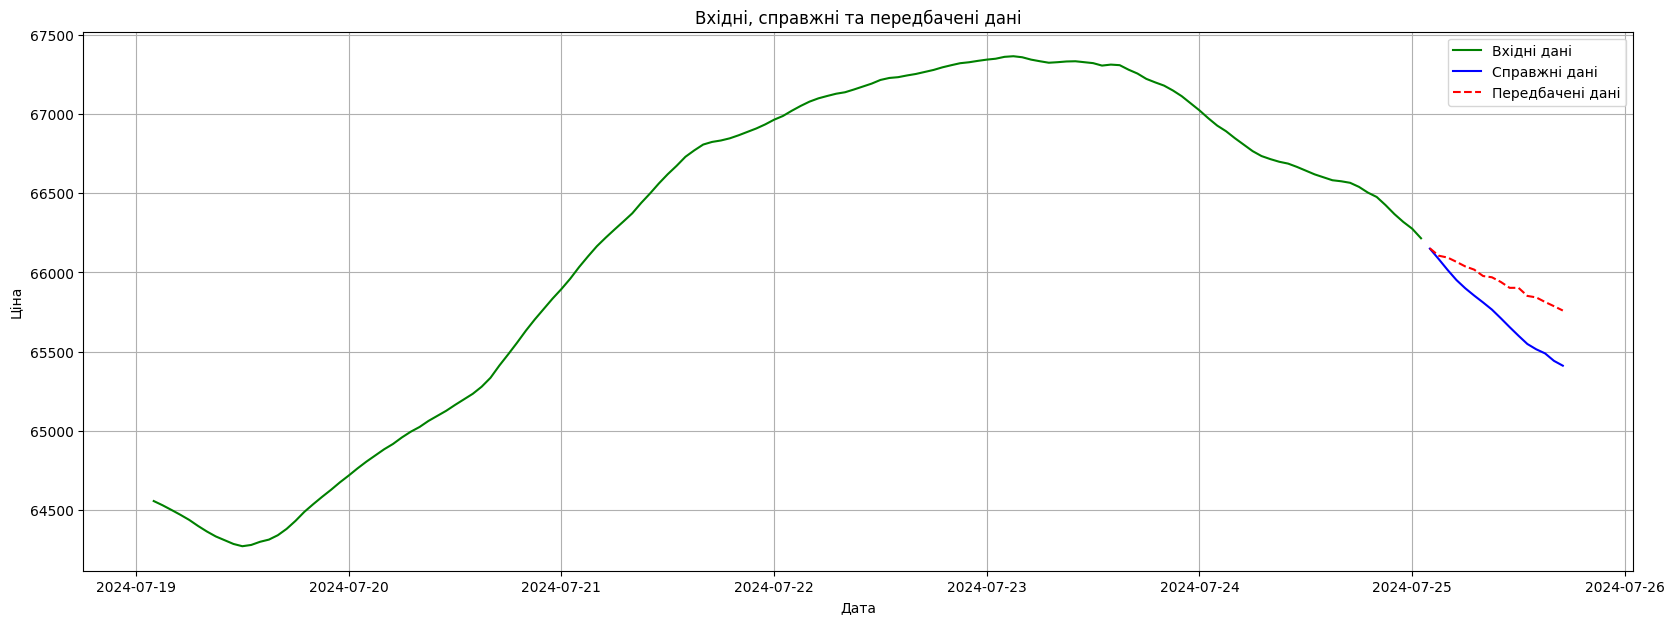

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


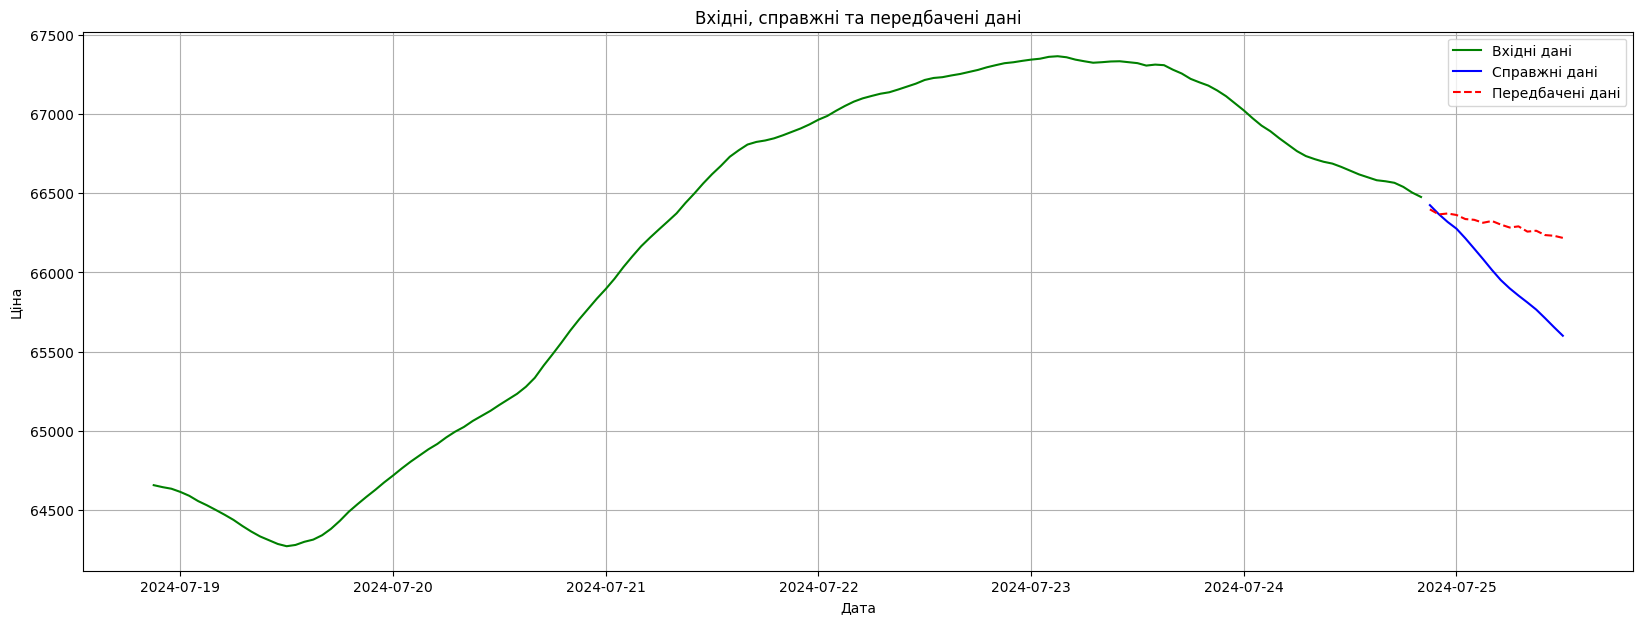

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


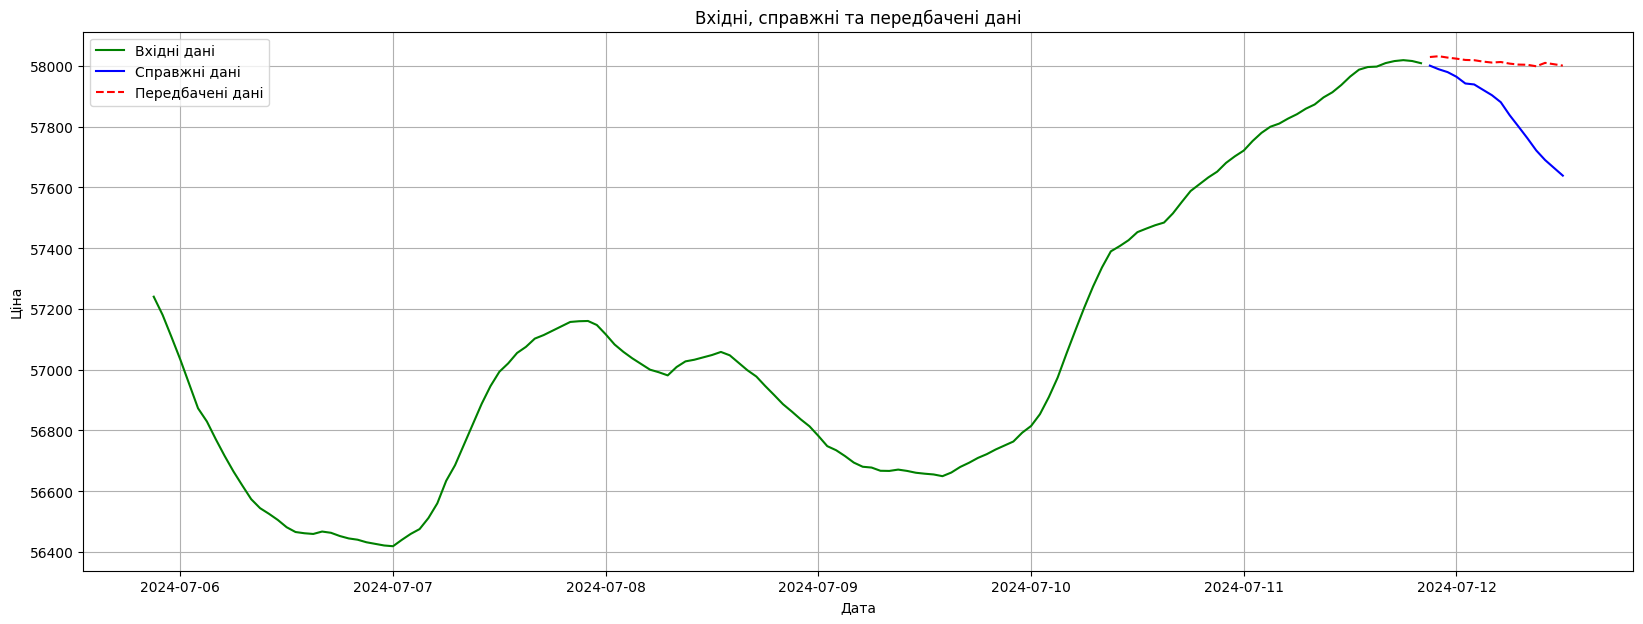

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


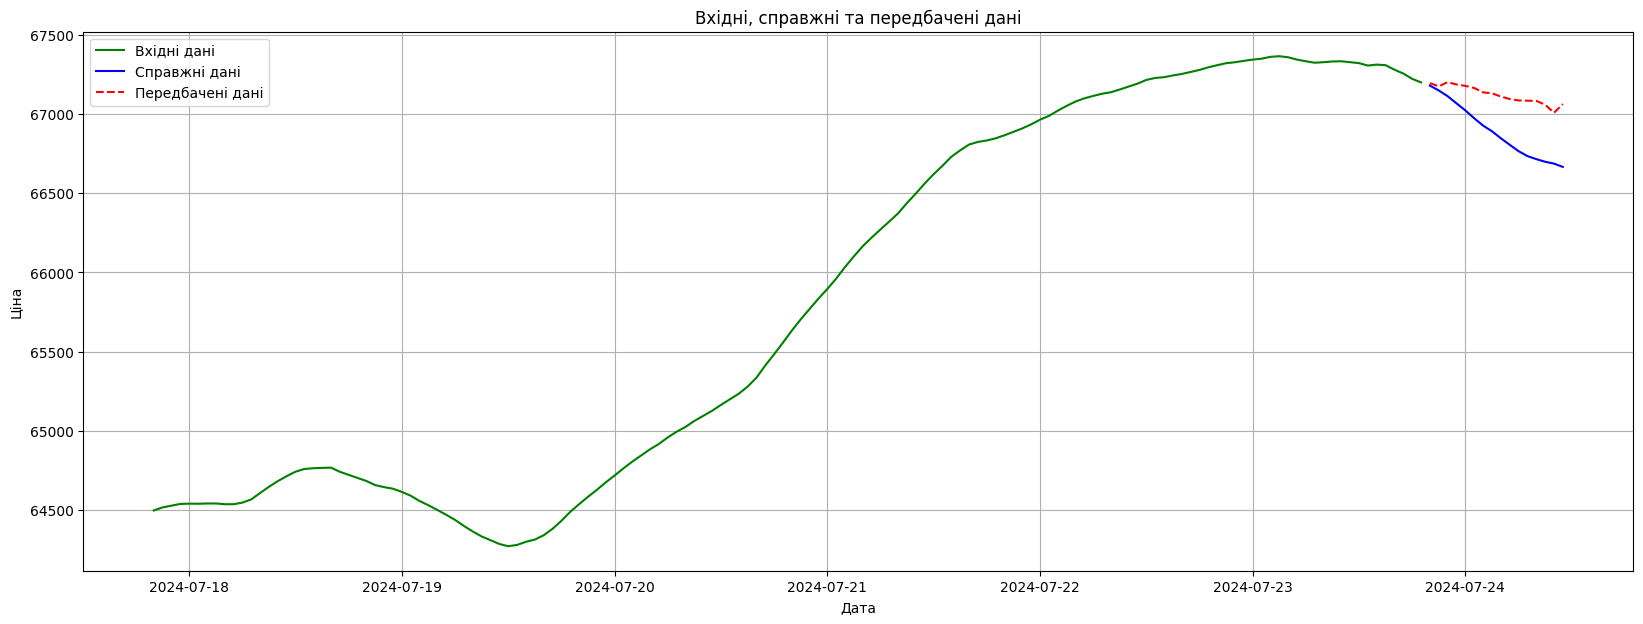

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


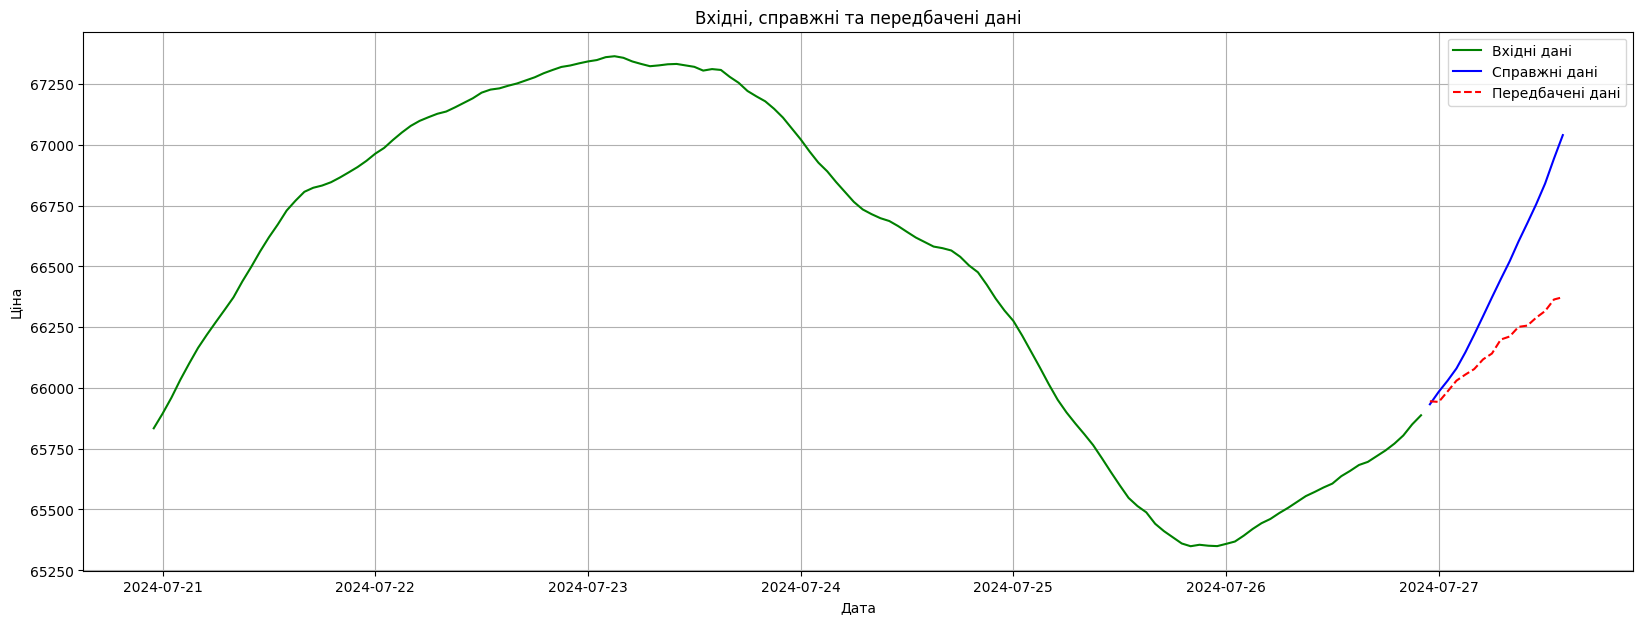

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


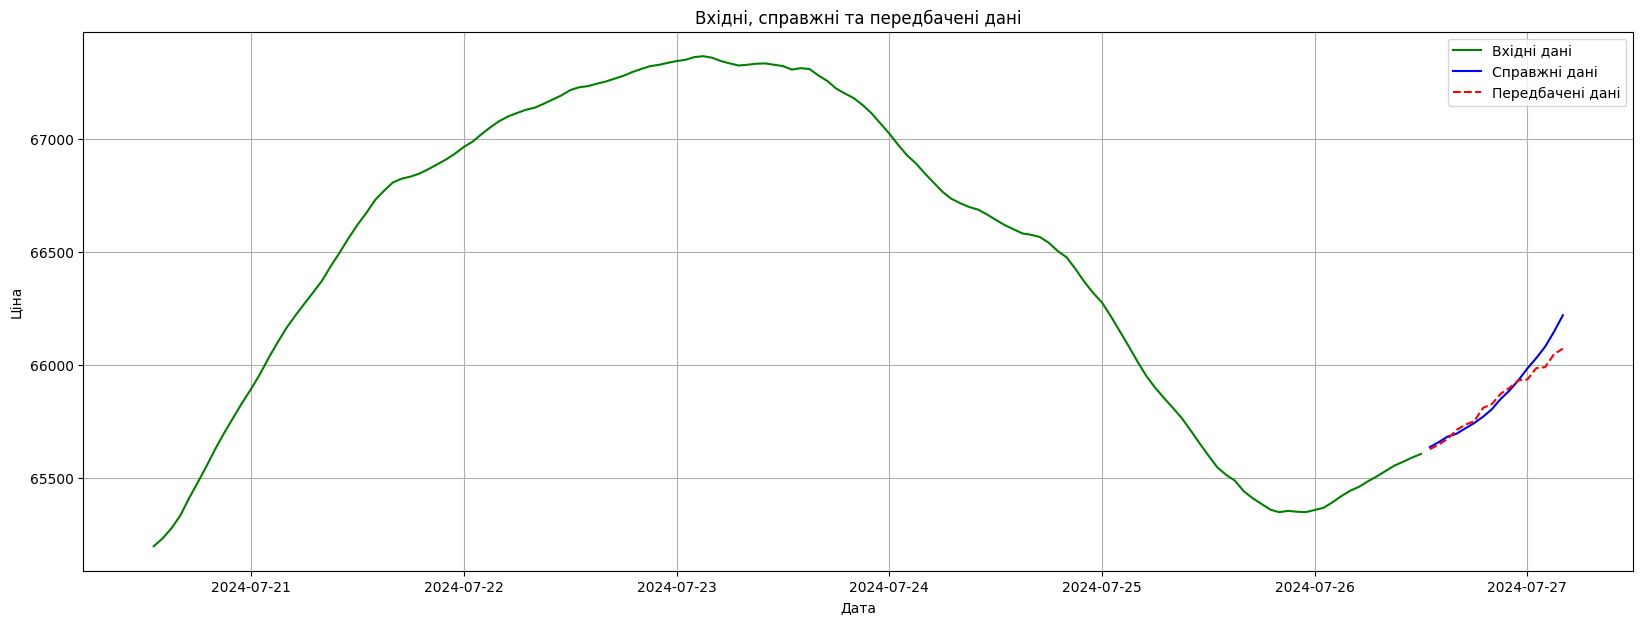

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


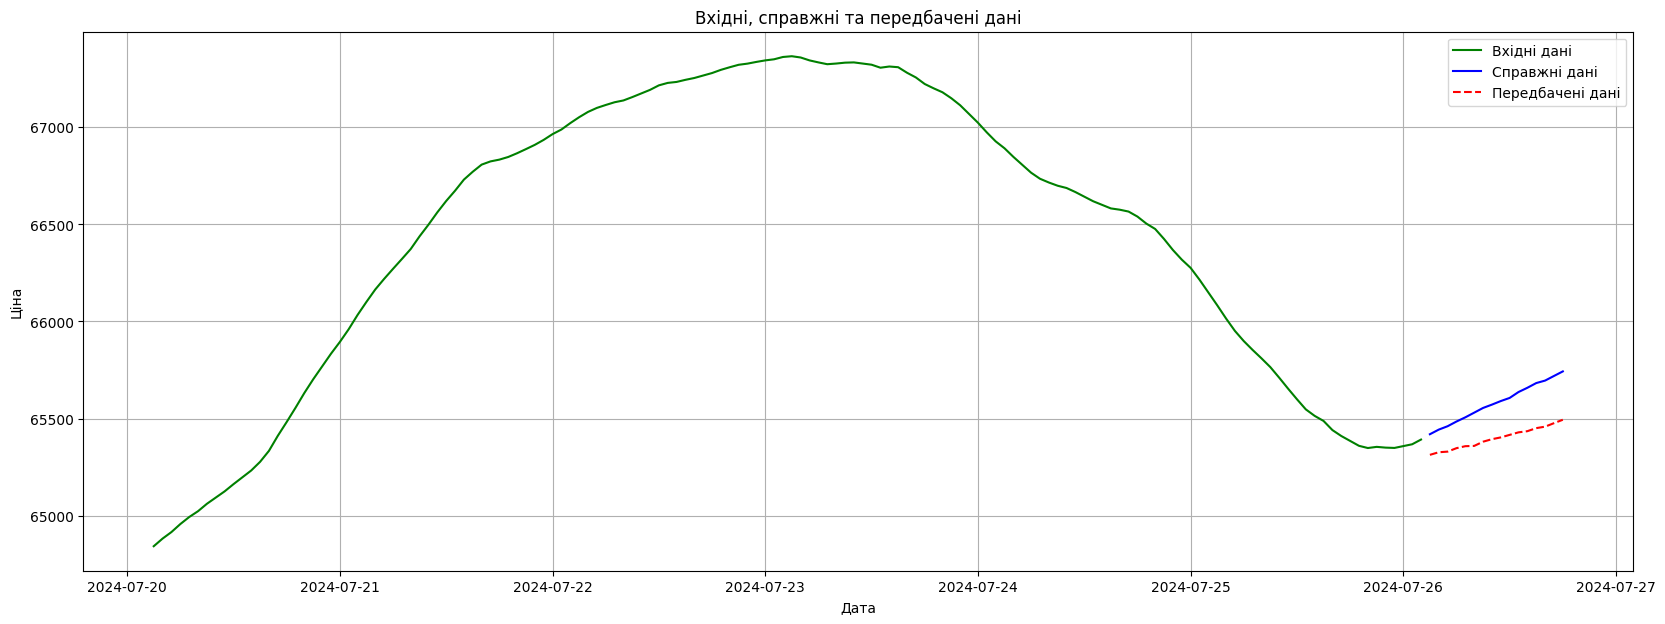

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


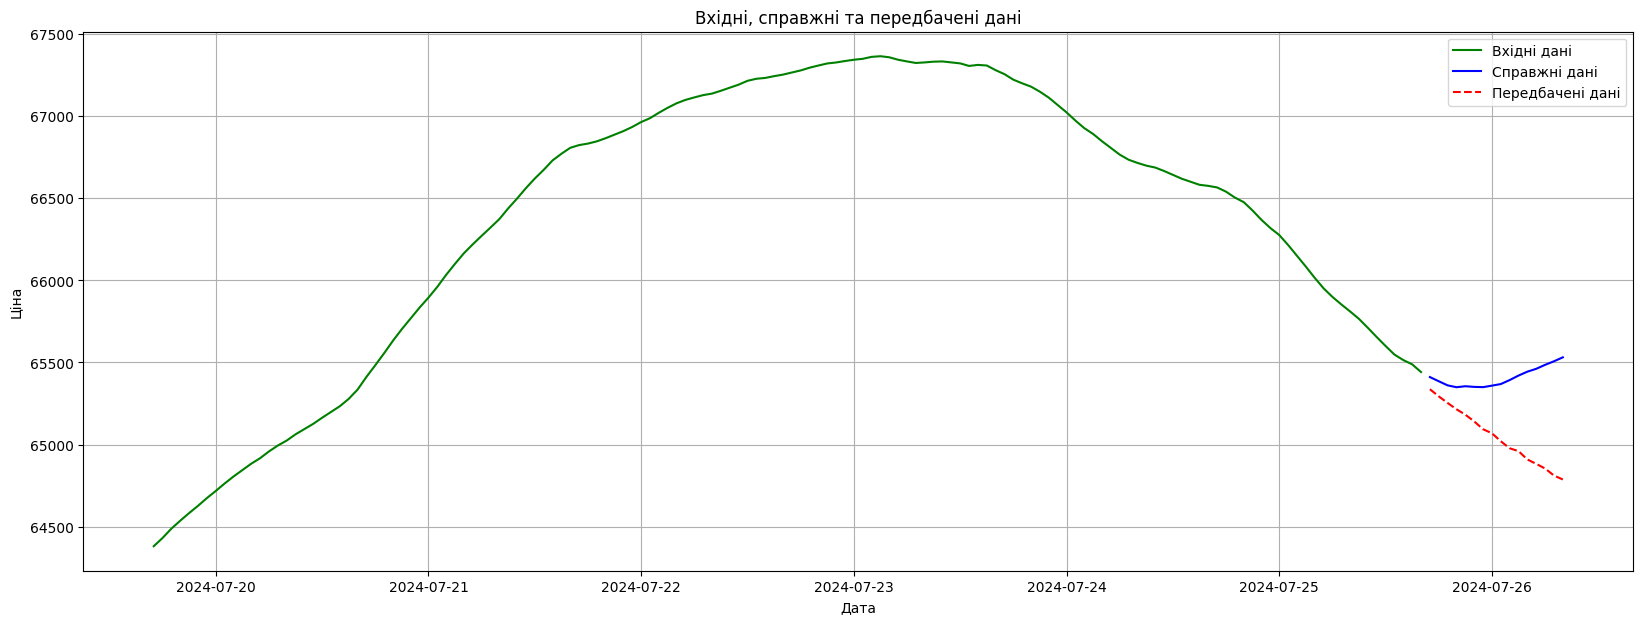

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


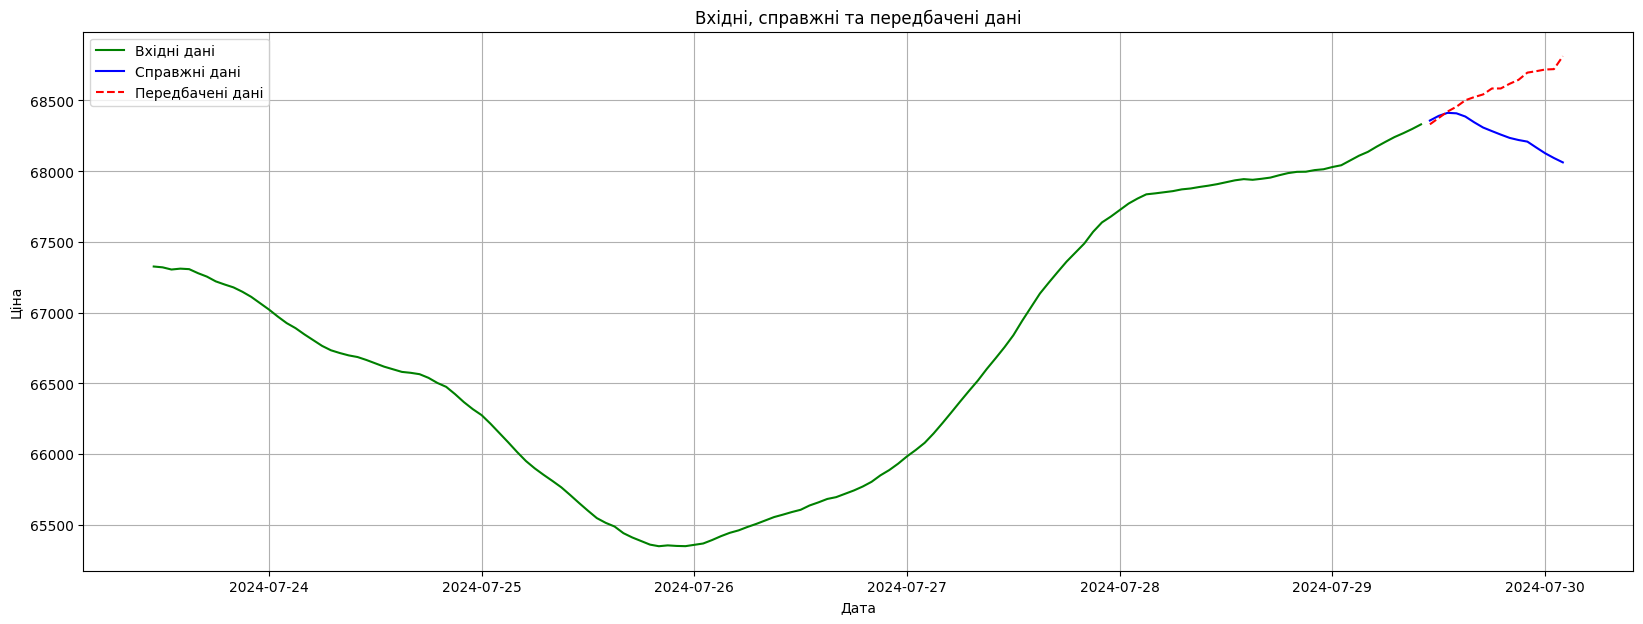

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


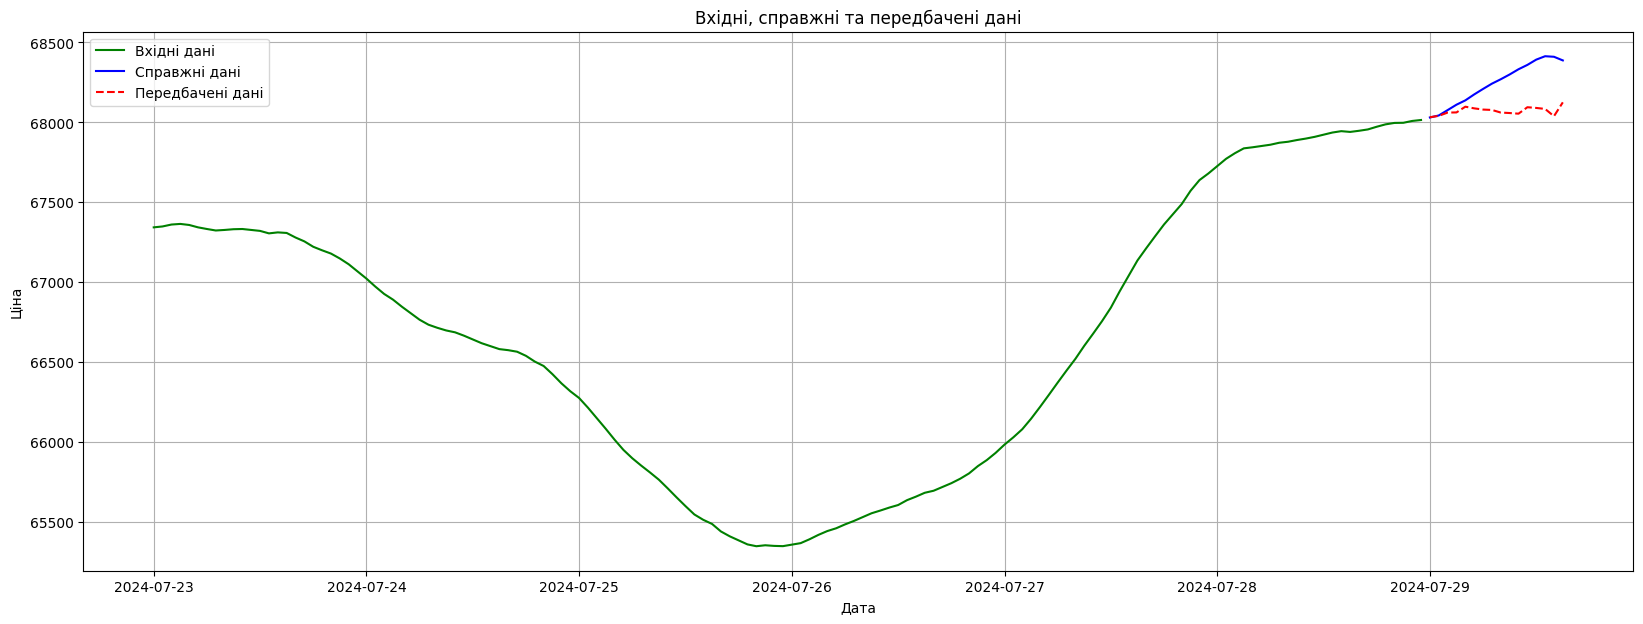

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

INFO - (NP.df_utils._infer_frequency) - Major frequency h corresponds to 99.996% of the data.
WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.to_datetime(ds_col, utc=True).view(dtype=np.int64)

WARNING - (py.warnings._showwarnmsg) - /opt/conda/lib/python3.10/site-packages/neuralprophet/df_utils.py:1152: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  converted_ds = pd.t

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


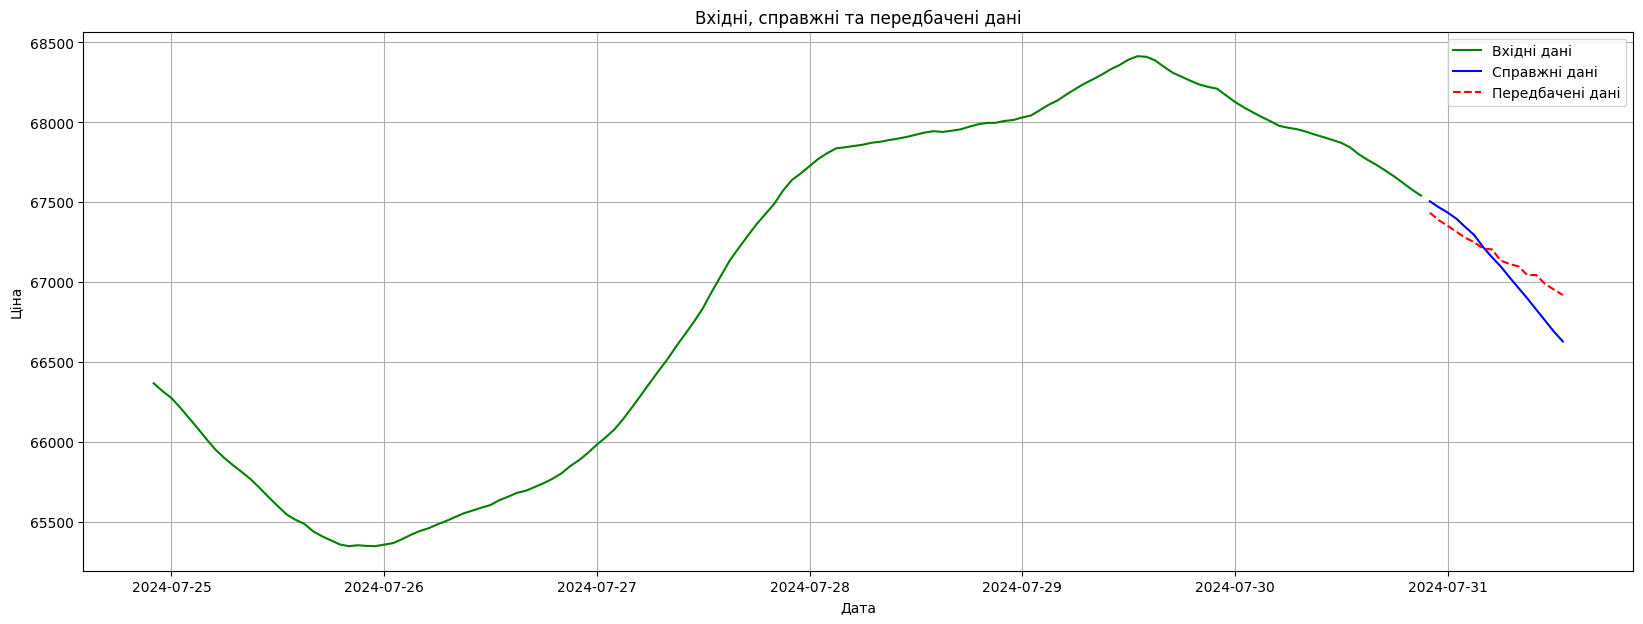

In [34]:
viz(-230)
viz(-414)
viz(-313)
viz(-257)
viz(-215)
viz(-160)
viz(-165)
viz(-477)
viz(-190)
viz(-115)
viz(-125)
viz(-135)
viz(-145)
viz(-55)
viz(-66)
viz(-20)

In [35]:
from neuralprophet import save
save(m, "SMA50-BTCUSDT-1h.np")